# Principal Component Analysis

### Data Source
The dataset used in this analysis is the famous **Iris dataset**, originally collected by British biologist and statistician **Edgar Anderson** and introduced by **Ronald A. Fisher** in 1936 in his paper *"The use of multiple measurements in taxonomic problems."* It is commonly used for testing machine learning algorithms and statistical models.

### Dataset Attributes
- **Id**: Unique identifier for each observation.
- **SepalLengthCm**: Length of the sepal (in centimeters).
- **SepalWidthCm**: Width of the sepal (in centimeters).
- **PetalLengthCm**: Length of the petal (in centimeters).
- **PetalWidthCm**: Width of the petal (in centimeters).
- **Species**: The species of the iris flower. There are three species in the dataset:
  - *Iris-setosa*
  - *Iris-versicolor*
  - *Iris-virginica*

## Objective
The goal of this analysis is to reduce the dimensionality of the Iris dataset using Principal Component Analysis (PCA) while preserving as much variance as possible, to identify and visualize key patterns and relationships between the features.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline ensures that plots appear in the notebook immediately after the code cell is run
%matplotlib inline

# Machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Load and Explore Data

In [2]:
# Load the Iris dataset
try:
    iris_df = pd.read_csv("Iris.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'Iris.csv' was not found.")
    iris_df = pd.DataFrame()

# Display the first few rows of the DataFrame if it is not empty
if not iris_df.empty:
    display(iris_df.head())
else:
    print("DataFrame is empty. Please check the file path and try again.")


Dataset loaded successfully!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Drop the 'Id' column as it is not useful for EDA
iris_df = iris_df.drop(['Id'], axis=1)

display(iris_df.head())


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Generate descriptive statistics for the numerical columns in the dataset
iris_df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- This summary provides the statistical overview of the dataset's numeric columns. 

- It shows that there are 150 observations for each feature. 

- The mean and median (50%) values for the sepal and petal measurements are relatively close, indicating a roughly symmetric distribution. 

- The standard deviations indicate that petal measurements have more variability compared to sepals. 

- The minimum and maximum values highlight the range of measurements for each feature.

In [5]:
# Display information about the DataFrame, including data types and non-null counts
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


This dataset contains 150 entries with no missing values, as all columns have 150 non-null values. The four numeric features (sepal and petal measurements) are of type `float64` and will be used for Principal Component Analysis (PCA). The `Species` column, of type `object`, represents the species of the iris flowers and will not be included in the PCA, but will serve as a reference for comparison in the final visualization.

In [6]:
# Number of rows before removing duplicates
initial_row_count = iris_df.shape[0]
print(f"Number of rows in dataset: {initial_row_count}")

# Identify and display duplicate rows
duplicates = iris_df[iris_df.duplicated()]

if not duplicates.empty:
    display(duplicates)
    duplicate_count = len(duplicates)
    print(f"Number of duplicate rows: {duplicate_count}")
    
    # Remove duplicates
    iris_df = iris_df.drop_duplicates()
    print("Duplicates have been removed.")
    
    # Number of rows after removing duplicates
    final_row_count = iris_df.shape[0]
    print(f"Number of rows after removing duplicates: {final_row_count}")
else:
    print("No duplicate rows found.")


Number of rows in dataset: 150


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Number of duplicate rows: 3
Duplicates have been removed.
Number of rows after removing duplicates: 147


In [7]:
# Display the dimensions of the DataFrame (number of rows, number of columns)
iris_df.shape


(147, 5)

In [8]:
# Count the occurrences of each unique value in the 'Species' column
iris_df['Species'].value_counts()


Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

This output shows that the dataset has an almost equal distribution of species, with **50 occurrences** for **Iris-versicolor**, and only slightly fewer occurrences of **Iris-setosa** and **Iris-virginica**. 

The balanced nature of the data suggests that no species is over- or underrepresented, which is beneficial for dimensionality reduction tasks like Principal Component Analysis (PCA). In PCA, a balanced dataset ensures that each species contributes proportionally to the variance captured by the principal components, leading to more meaningful and interpretable results. While balancing data is more crucial in classification tasks, the minimal differences in class counts are unlikely to have a significant impact on the PCA outcomes.

In [9]:
# Set 'Species' as the index to allow for easier manipulation and analysis of the numerical features
clean_df = iris_df.set_index('Species')

# Display the first few rows to check if the index has been set correctly
clean_df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


- Setting the `'Species'` column as the index does **not affect** the PCA computation itself, as PCA only processes numeric data.
- It can make it easier to organize, visualize, and compare results when labeling or grouping the PCA output by species.

## Preprocessing and Feature Selection

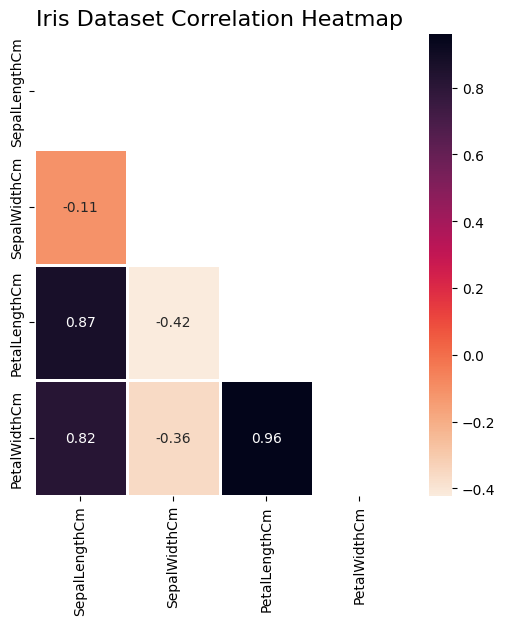

In [10]:
def corr_heatmap(df, cmap='rocket_r', title="Correlation Heatmap"):
    """
    Function to plot a correlation heatmap for a given dataframe.
    It masks the upper triangle of the heatmap to avoid redundancy.
    
    Parameters:
    df : DataFrame
        The input dataframe for which the correlation heatmap is to be plotted.
    cmap : str (optional)
        The colormap or color palette to be used for the heatmap. Default is 'rocket_r'.
    title : str (optional)
        The title for the heatmap. Default is 'Correlation Heatmap'.
    """
    # Get correlation matrix of the dataframe
    corrs = df.corr()

    # Plot figure size
    fig, ax = plt.subplots(figsize=(6, 6))

    # Create a mask for the upper triangle to avoid redundant information
    matrix = np.triu(corrs)

    # Generate the heatmap with annotations for the correlation coefficients
    sns.heatmap(corrs, cmap=cmap, annot=True, fmt=".2f", mask=matrix, linewidths=2, ax=ax)

    # Add a title to the heatmap
    ax.set_title(title, fontsize=16)


# Call the function on the clean_df with custom colormap and title
corr_heatmap(clean_df, cmap='rocket_r', title="Iris Dataset Correlation Heatmap")


### Assumptions

The heatmap suggests that **PetalLengthCm and PetalWidthCm** are highly correlated and may contribute similarly to the variance, making them candidates for dimensionality reduction via PCA. Meanwhile, **SepalWidthCm** provides distinct information and is less likely to be redundant.

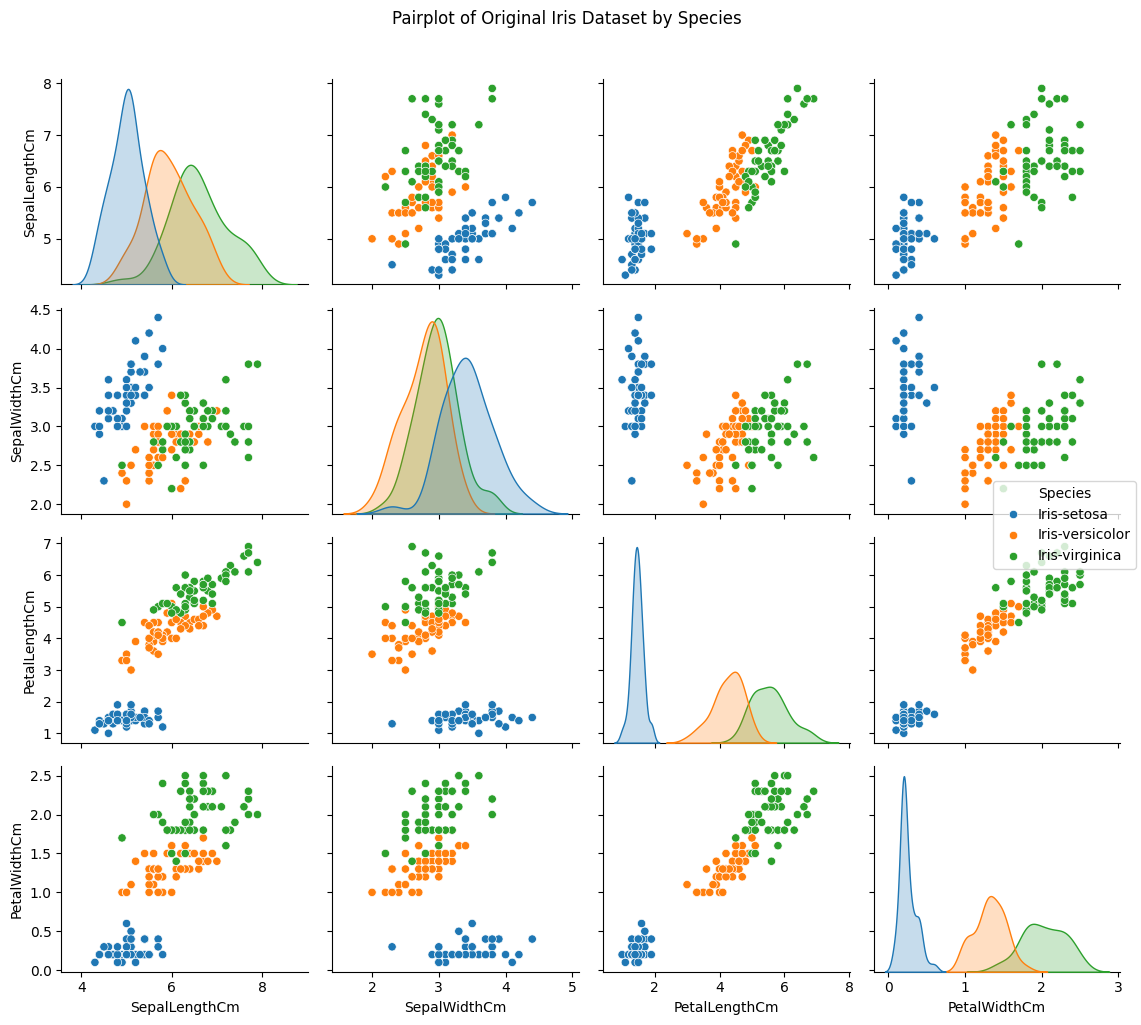

In [11]:
# Use the iris_df
pairplot = sns.pairplot(iris_df, hue="Species")

# Set title and adjust figure size
plt.suptitle("Pairplot of Original Iris Dataset by Species", y=1.02)

# Move the legend outside the plot
pairplot._legend.set_bbox_to_anchor((1, 0.5))
pairplot._legend.set_frame_on(True)

# Adjust the layout to prevent overlap
plt.tight_layout()


### Assumptions:

The pairplot shows **linear relationships** between several features, particularly between `PetalLengthCm` and `PetalWidthCm`, indicating that PCA can effectively reduce dimensionality. Species clusters are well-separated, especially for `Iris-setosa`, supporting PCA's potential to capture important variance. Some features, like `SepalLengthCm` vs. `SepalWidthCm`, show weaker linearity, which may impact PCA performance slightly but overall suggests PCA is suitable.

# Apply PCA

In [12]:
# Standardize the features to ensure that they are on the same scale
scaler = StandardScaler()
X = scaler.fit_transform(clean_df.values)

# Print the shape of the selected data to confirm its size
print('Data size:')
print(X.shape)


Data size:
(147, 4)


For the Iris dataset, using **StandardScaler** ensures that PCA captures the **true structure** of the data by equalizing the contributions of all features, regardless of their original scales.

In [13]:
# Choose the number of components to be generated
nr_comps = 3
pca = PCA(n_components=nr_comps)

# Obtain principal components by fitting and transforming the data
principal_components = pca.fit_transform(X)

# Get the explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Print cumulative variance to determine how many components to retain
print("Explained variance ratio:", explained_variance)
print("Cumulative variance ratio:", cumulative_variance)


Explained variance ratio: [0.72738591 0.23030014 0.03702645]
Cumulative variance ratio: [0.72738591 0.95768605 0.9947125 ]


The **explained variance ratio** shows that the first two components capture **95.7%** of the total variance, while adding the third component increases it to **99.5%**. Since we were tasked with setting 3 components, nearly all the variance (99.5%) in the data is preserved.

This means that almost all the important information from the original dataset is retained, but in fewer dimensions. This reduces complexity while maintaining nearly all the original data’s structure and relationships.

In [14]:
# Transform the components into a pandas DataFrame, retaining the index from the original DataFrame
pca_df = pd.DataFrame(principal_components, index=clean_df.index)

# Display the first few rows of the principal components
pca_df.sample(5)

,0,1,2
Species,,,
Iris-virginica,1.845611,0.545620,0.713236
Iris-versicolor,-0.151620,-2.651130,0.037819
Iris-setosa,-2.216782,0.495271,0.046721
Iris-versicolor,1.083643,0.849886,0.682969
Iris-setosa,-2.254967,0.144686,-0.114448


The PCA transformation has created new dimensions (principal components) that capture the majority of the variance in the Iris dataset.

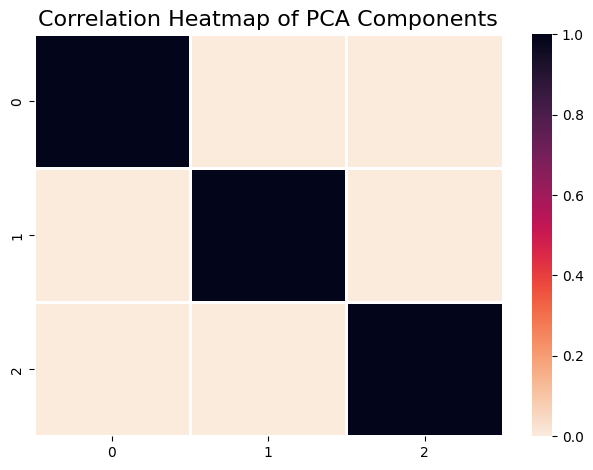

In [15]:
# Plot the correlation heatmap for the PCA components
ax = sns.heatmap(pca_df.corr(), cmap='rocket_r', linewidths=1)

# Add a title to the heatmap
ax.set_title('Correlation Heatmap of PCA Components', fontsize=16)

# Adjust the layout
plt.tight_layout()


### Assumptions 

- The heatmap shows that the **principal components (PC1, PC2, and PC3)** are uncorrelated with each other (correlation values close to 0). 

- The PCA successfully transformed the data into **uncorrelated principal components**, demonstrating that each new variable captures different aspects of the variance, making the data easier to interpret and analyze in a reduced form.

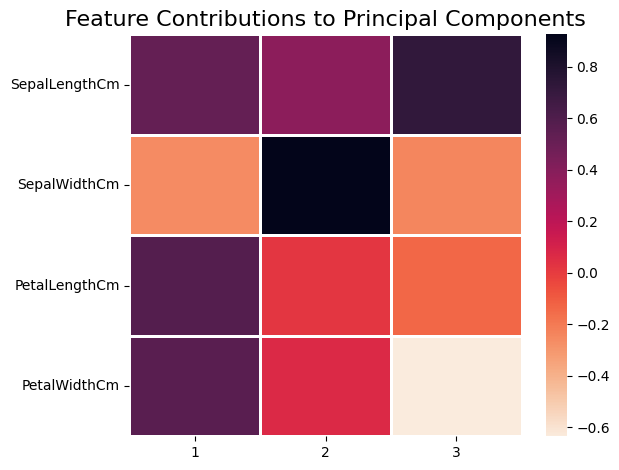

In [16]:
# Create a DataFrame for PCA components with feature names as columns and components as rows
components = pd.DataFrame(pca.components_, columns=clean_df.columns, index=range(1, nr_comps + 1)).transpose()

# Plot a heatmap to visualize the contribution of each feature to each principal component
heatmap_ax = sns.heatmap(components, cmap='rocket_r', linewidths=1)

# Add a title to the heatmap
heatmap_ax.set_title('Feature Contributions to Principal Components', fontsize=16)

# Ensure layout fits without overlap
plt.tight_layout()  


### Assumptions:

- **PC1**: Strongly influenced by **petal features** (PetalLengthCm, PetalWidthCm).
- **PC2**: Mostly captures variance from **SepalWidthCm**.
- **PC3**: Mainly impacted by **SepalLengthCm**.

These patterns suggest that the first principal component (PC1) might be the most useful in summarizing the petal characteristics, while the second and third components focus more on sepal-related features.

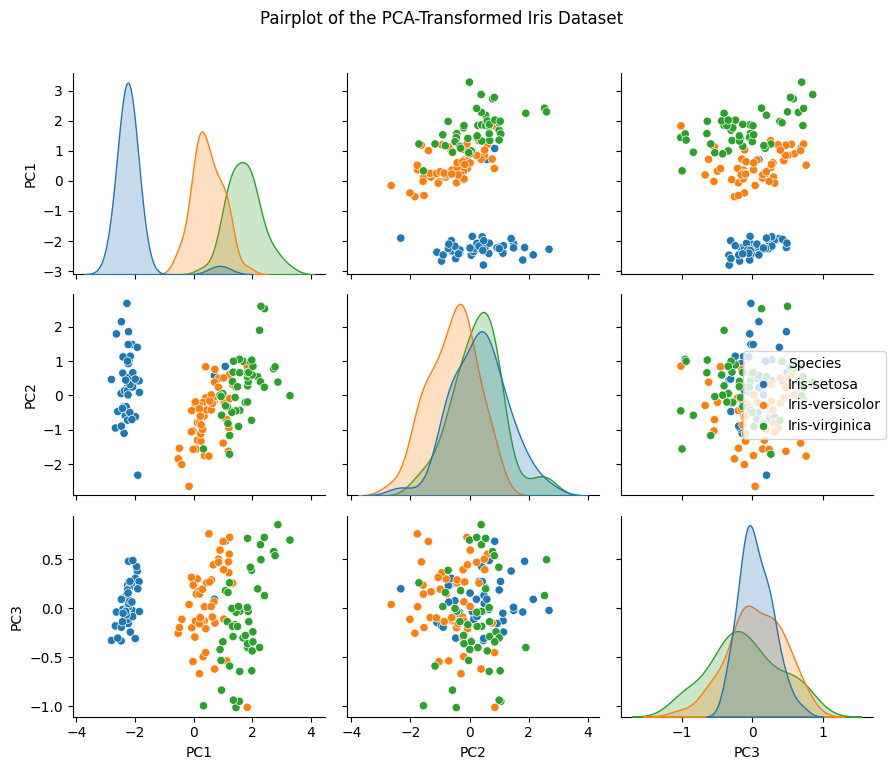

In [17]:
# Convert the PCA-transformed data into a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Add the 'Species' column from the original DataFrame
pca_df['Species'] = iris_df['Species']

# Plot the PCA-transformed data using pairplot
pairplot = sns.pairplot(pca_df, hue='Species')

# Move the legend outside the plot
pairplot._legend.set_bbox_to_anchor((1, 0.5))
pairplot._legend.set_frame_on(True)

# Add a title to the plot and adjust layout to avoid overlap
plt.suptitle("Pairplot of the PCA-Transformed Iris Dataset", y=1.02)
plt.tight_layout()


The **original pairplot** (CELL 11) of the Iris dataset shows clear separation for **Iris-setosa**, but significant overlap between **Iris-versicolor** and **Iris-virginica**, particularly across feature combinations like **SepalLengthCm** and **SepalWidthCm** or **PetalLengthCm** and **PetalWidthCm**. This overlap suggests that some features carry redundant information, especially the petal measurements, which are highly correlated, making it harder to distinguish species effectively.

In contrast, the **PCA-transformed pairplot** reveals better separation between the species, especially along **PC1**, which captures most of the variance. **PC1** helps distinguish species based on petal-related features, while **PC2** captures variance related to sepal measurements. The overlap between **Iris-versicolor** and **Iris-virginica** has decreased significantly in PC1, meaning that PCA has successfully reduced redundancy, summarizing the key information into fewer dimensions.

### Redundancy Removed:
- **Correlated Features**: The strong correlation between petal features (length and width) in the original plot indicated that they carried overlapping information. PCA has consolidated this variance into **PC1**, reducing the need to consider both petal length and width separately.
- **Improved Clarity**: By reducing the dataset to three principal components (PC1, PC2, PC3), PCA has removed redundant feature information, helping to better separate species, particularly in cases where **Iris-versicolor** and **Iris-virginica** overlapped in the original dataset.

### Conclusion:
The PCA transformation has effectively removed redundancy by summarizing highly correlated features into fewer dimensions, leading to improved species separation, particularly between **Iris-versicolor** and **Iris-virginica**, which were harder to distinguish in the original dataset.

## References

https://safjan.com/before-pca/#:~:text=Before%20applying%20PCA%20to%20a%20dataset%20for%20dimensionality%20reduction%2C%20we,most%20out%20of%20the%20data.

https://stackoverflow.com/questions/47370795/pca-on-sklearn-how-to-interpret-pca-components

https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://www.ibm.com/topics/principal-component-analysis#:~:text=Linearity%3A%20PCA%20is%20a%20linear,more%20complex%20relationships%20between%20variables.

https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap

https://www.datacamp.com/tutorial/pca-analysis-r

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

https://stats.stackexchange.com/questions/31832/how-to-handle-data-imbalance-in-principal-component-analysis

https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset

https://medium.com/analytics-vidhya/principal-component-analysis-pca-8a0fcba2e30c#:~:text=PCA%20is%20affected%20by%20scale,of%20many%20Machine%20Learning%20algorithms.

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/